In [1]:
from quantum_logical.crowding_experiment import crowding
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import scienceplots
import h5py 
plt.style.use(['ieee'])
plt.rcParams["font.family"] = "Arial"
plt.rcParams['mathtext.rm'] = 'Arial'

In [2]:
dict1 = {'0':'\u2070','1':'\u00b9','2':'\u00b2',
         '3':'\u00b3','4':'\u2074','5':'\u2075',         
         '6':'\u2076','7':'\u2077','8':'\u2078',
         '9':'\u2079','+':'\u207A','-':'\u207B',
         '=':'\u207C','(':'\u207D',')':'\u207E',
         'a':'\u1d43','b':'\u1d47','c':'\u1D9C',
         'd':'\u1d48','e':'\u1d49','f':'\u1da0',
         'g':'\u1d4d','h':'\u02b0','i':'\u2071',
         'j':'\u02b2','k':'\u1d4f','l':'\u02e1',
         'm':'\u1d50','n':'\u207f','o':'\u1d52',
         'p':'\u1d56','r':'\u02b3','s':'\u02e2',
         't':'\u1d57','u':'\u1d58','v':'\u1d5b',
         'w':'\u02b7','x':'\u02e3','y':'\u02b8',
         'z':'\u1dbb','A':'\u1D2c','B':'\u1D2E',
         'D':'\u1d30','E':'\u1d31','G':'\u1d33',
         'H':'\u1d34','I':'\u1d35','J':'\u1d36',
         'K':'\u1d37','L':'\u1d38','M':'\u1d39',
         'N':'\u1d3a','O':'\u1d3c','P':'\u1d3e',
         'R':'\u1d3f','T':'\u1d40','U':'\u1d41',
         'V':'\u2c7d','W':'\u1d42','q':'\u146b'
         }

In [3]:
# freqs = np.linspace(4.00000001, 5.9999999999, 700)
freqs_ = np.linspace(4.250000001, 4.00001, 500)
freqs2 = np.linspace(5.9999999, 5.75, 500)
freqs = []
freqs.extend(freqs_)
freqs.extend(freqs2)
w1 = 6
w3 = []


fids = []
fids2 = []
fids3 = []
min_sep = []
main_min = []
min_sep2 = []
min_sep3 = []
min2 = []
min3 = []
min2.clear()
min3.clear()
amp = 0.12304347826086957
mag_amp = [[.1, 1.9665551839464883], [.2, 0.4916387959866221], [.3, 0.21872909698996654], [.4, 0.12304347826086957]]

freqs

[4.250000001,
 4.249499019034068,
 4.248998037068136,
 4.248497055102204,
 4.247996073136273,
 4.24749509117034,
 4.246994109204409,
 4.246493127238477,
 4.245992145272545,
 4.245491163306613,
 4.244990181340682,
 4.244489199374749,
 4.243988217408818,
 4.243487235442886,
 4.242986253476954,
 4.242485271511022,
 4.2419842895450905,
 4.241483307579158,
 4.240982325613227,
 4.240481343647295,
 4.239980361681363,
 4.239479379715431,
 4.2389783977494995,
 4.238477415783567,
 4.237976433817635,
 4.2374754518517035,
 4.236974469885771,
 4.23647348791984,
 4.2359725059539075,
 4.235471523987976,
 4.234970542022044,
 4.234469560056112,
 4.23396857809018,
 4.233467596124249,
 4.232966614158316,
 4.232465632192385,
 4.231964650226453,
 4.231463668260521,
 4.230962686294589,
 4.230461704328658,
 4.229960722362725,
 4.229459740396794,
 4.228958758430862,
 4.22845777646493,
 4.227956794498998,
 4.227455812533067,
 4.226954830567134,
 4.226453848601203,
 4.225952866635271,
 4.225451884669338,
 4.224

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [33:13<00:00,  1.99s/it]


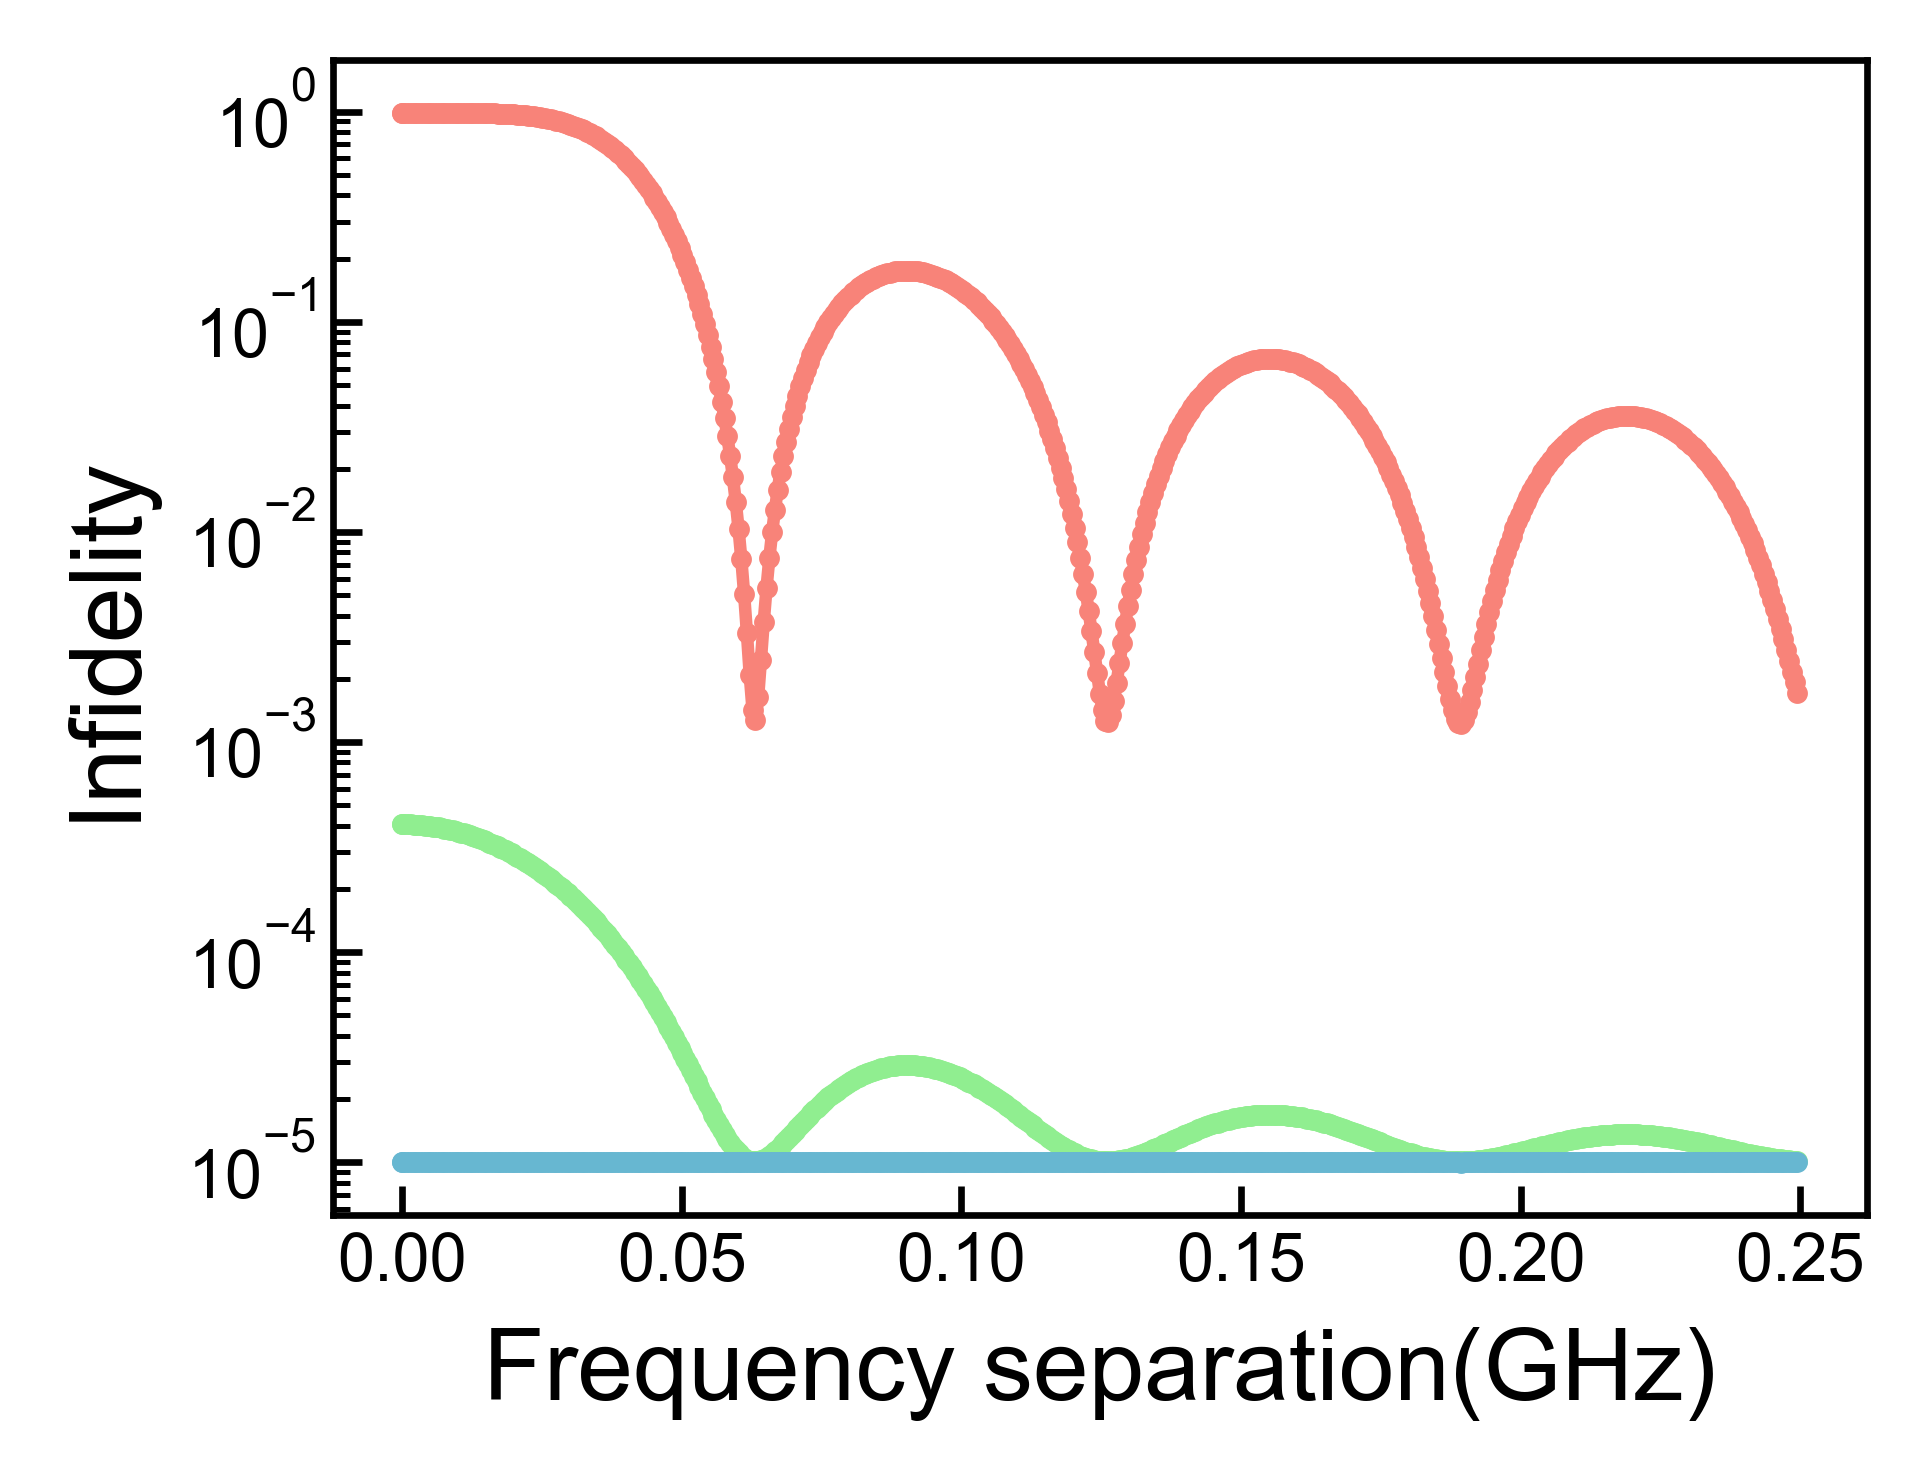

In [4]:
fids.clear()
fids2.clear()
fids3.clear()
min_sep.clear()
main_min.clear()
min_sep2.clear()
min_sep3.clear()
mins2 = []
mins3 = []
mins2.clear()
mins3.clear()
infid2 = []
infid4 = []
infid6 = []
infid2.clear()
infid4.clear()
infid6.clear()



for i in tqdm(freqs):
    w3.append((6 - i) + 4)
    H = crowding(qubit4_freq=i, qubit3_freq=4.5, lam_mag=mag_amp[0][0], lam_power=2, mod_num=2, amp=mag_amp[0][1])
    fids.append(H.result())
    A = crowding(qubit4_freq=i, qubit3_freq=4.5, lam_mag=mag_amp[0][0], lam_power=4, mod_num=2, amp=mag_amp[0][1])
    min_sep2.append(A.main_gate_sep())
    B = crowding(qubit4_freq=i, qubit3_freq=4.5, lam_mag=mag_amp[0][0], lam_power=6, mod_num=2, amp=mag_amp[0][1])
    min_sep3.append(B.main_gate_sep())
    fids2.append(A.result())
    fids3.append(B.result())
    min_sep.append(H.min_sep())
    mins2.append(A.min_sep())
    mins3.append(B.min_sep())
    main_min.append(H.main_gate_sep())

for i in range(len(fids)):
    infid2.append(1 - fids[i])
    infid4.append(1 - fids2[i])
    infid6.append(1 - fids3[i])


# fig, axs = plt.subplots()
fig, axs = plt.subplots()
# axs.plot(min_sep, fids, 'o', linestyle = '-')
# axs.plot(min2, fids2, 'o', linestyle = '-')
# axs.plot(min3, fids3, 'o', linestyle = '-')
axs.set_ylabel('Infidelity', fontsize = 12)
axs.set_xlabel('Frequency separation(GHz)', fontsize = 12)
axs.tick_params(axis="y",direction="in", pad = 2)
axs.tick_params(axis="x",direction="in", pad = 2)
axs.tick_params(which='minor', direction = 'in')
axs.yaxis.get_major_ticks()[1].label1.set_visible(False)
axs.plot(min_sep[499:999], infid2[499:999], '.', markersize = 3, linestyle = '-', color = '#F88379')
axs.plot(mins2[499:999], infid4[499:999], '.', markersize = 3, linestyle = '-', color = '#90EE90')
axs.plot(mins3[499:999], infid6[499:999], '.', markersize = 3, linestyle = '-', color = '#67B7D1')
plt.yscale("log") 
# axs.invert_yaxis()
# image_format = 'svg' # e.g .png, .svg, etc.
# image_name = 'crowding_experiment_1.svg'
# fig.savefig(image_name, format=image_format, dpi=1600)
# plt.xlim(.04, .08)


In [6]:
# allows me to store the data and not have to run the file many times just to manipulate the data 
with h5py.File("data_crowding.hdf5", "w") as f:
    data = f.create_dataset("infid2", data=infid2)
    data2 = f.create_dataset("min_sep2", data=min_sep)
    data3 = f.create_dataset("infid4", data=infid4)
    data4 = f.create_dataset("min_sep4", data=mins2)
    data5 = f.create_dataset("infid6", data=infid6)
    data6 = f.create_dataset("min_sep6", data=mins3)

with h5py.File("data_crowding.hdf5", "r") as f:
    res = f['infid2'][()]
    res2 = f['min_sep2'][()]
    res3 = f['infid4'][()]
    res4 = f['min_sep4'][()]
    res5 = f['infid6'][()]
    res6 = f['min_sep6'][()]

In [7]:
# make the data only contain the lowest point for the sake of finding the results 
# infid list readjusted for better results 
# inverting the list
infid_re = []
infid_re.extend(infid2[499:999])
infid_re4 = []
infid_re4.extend(infid4[499:999])
infid_re6 = []
infid_re6.extend(infid6[499:999])
# infid_re.extend(infid2.reverse())
# for i in range(len(infid2)):
#     if infid2[i] < infid2[len(infid2) - i - 1]:
#         infid_re.append(infid2[i])
#     else: 
#         infid_re.append(infid2[len(infid2) - i - 1])


In [56]:
# find the minima at those points 
min1 = np.min(infid_re[0:160])
min2 = np.min(infid_re[160:320])
min3 = np.min(infid_re[320:440])
min14 = np.min(infid_re4[0:160])
min24 = np.min(infid_re4[160:320])
min34 = np.min(infid_re4[320:440])
min16 = np.min(infid_re6[0:160])
min26 = np.min(infid_re6[160:320])
min36 = np.min(infid_re6[320:440])
# print(f"min1={min1} and min2={min2} and min3={min3}")
# find the location of these mins 
index1 = infid_re.index(min1)
index2 = infid_re.index(min2)
index3 = infid_re.index(min3)
index14 = infid_re4.index(min14)
index24 = infid_re4.index(min24)
index34 = infid_re4.index(min34)
index16 = infid_re6.index(min16)
index26 = infid_re6.index(min26)
index36 = infid_re6.index(min36)
# print(f"index1 = {infid_re.index(min1)} index2 = {infid_re.index(min2)} index3 = {infid_re.index(min3)}")
# define variables
error_sep = .025
# index spots corresponding to the results 
index_correctors = error_sep / (np.abs(freqs[0] - freqs[int(len(freqs) / 2) - 1]) / (len(infid2) / 2)) 
index_correctors4 = error_sep / (np.abs(freqs[0] - freqs[int(len(freqs) / 2) - 1]) / (len(infid4) / 2)) 
index_correctors6 = error_sep / (np.abs(freqs[0] - freqs[int(len(freqs) / 2) - 1]) / (len(infid6) / 2)) 

In [57]:
# make the max smoothing function
# for every point in the function the max up to a certain range away from the point on both sides becomes the new value of the point
# range determined by the values find above for the index 
# the code below should work but there was one mistake that you made this is stupid. 
# make a new array to line with values otherwise it will keep a straight line because of how stupid this is 


In [58]:
infid_use = []
infid_use.clear()

In [59]:
for i in range(int(index_correctors)):
    infid_use.append(0)

infid_use.extend(infid_re)

for i in range(int(index_correctors)):
    infid_use.append(0)

len(infid_use)

600

In [60]:
infid_new_plot = []

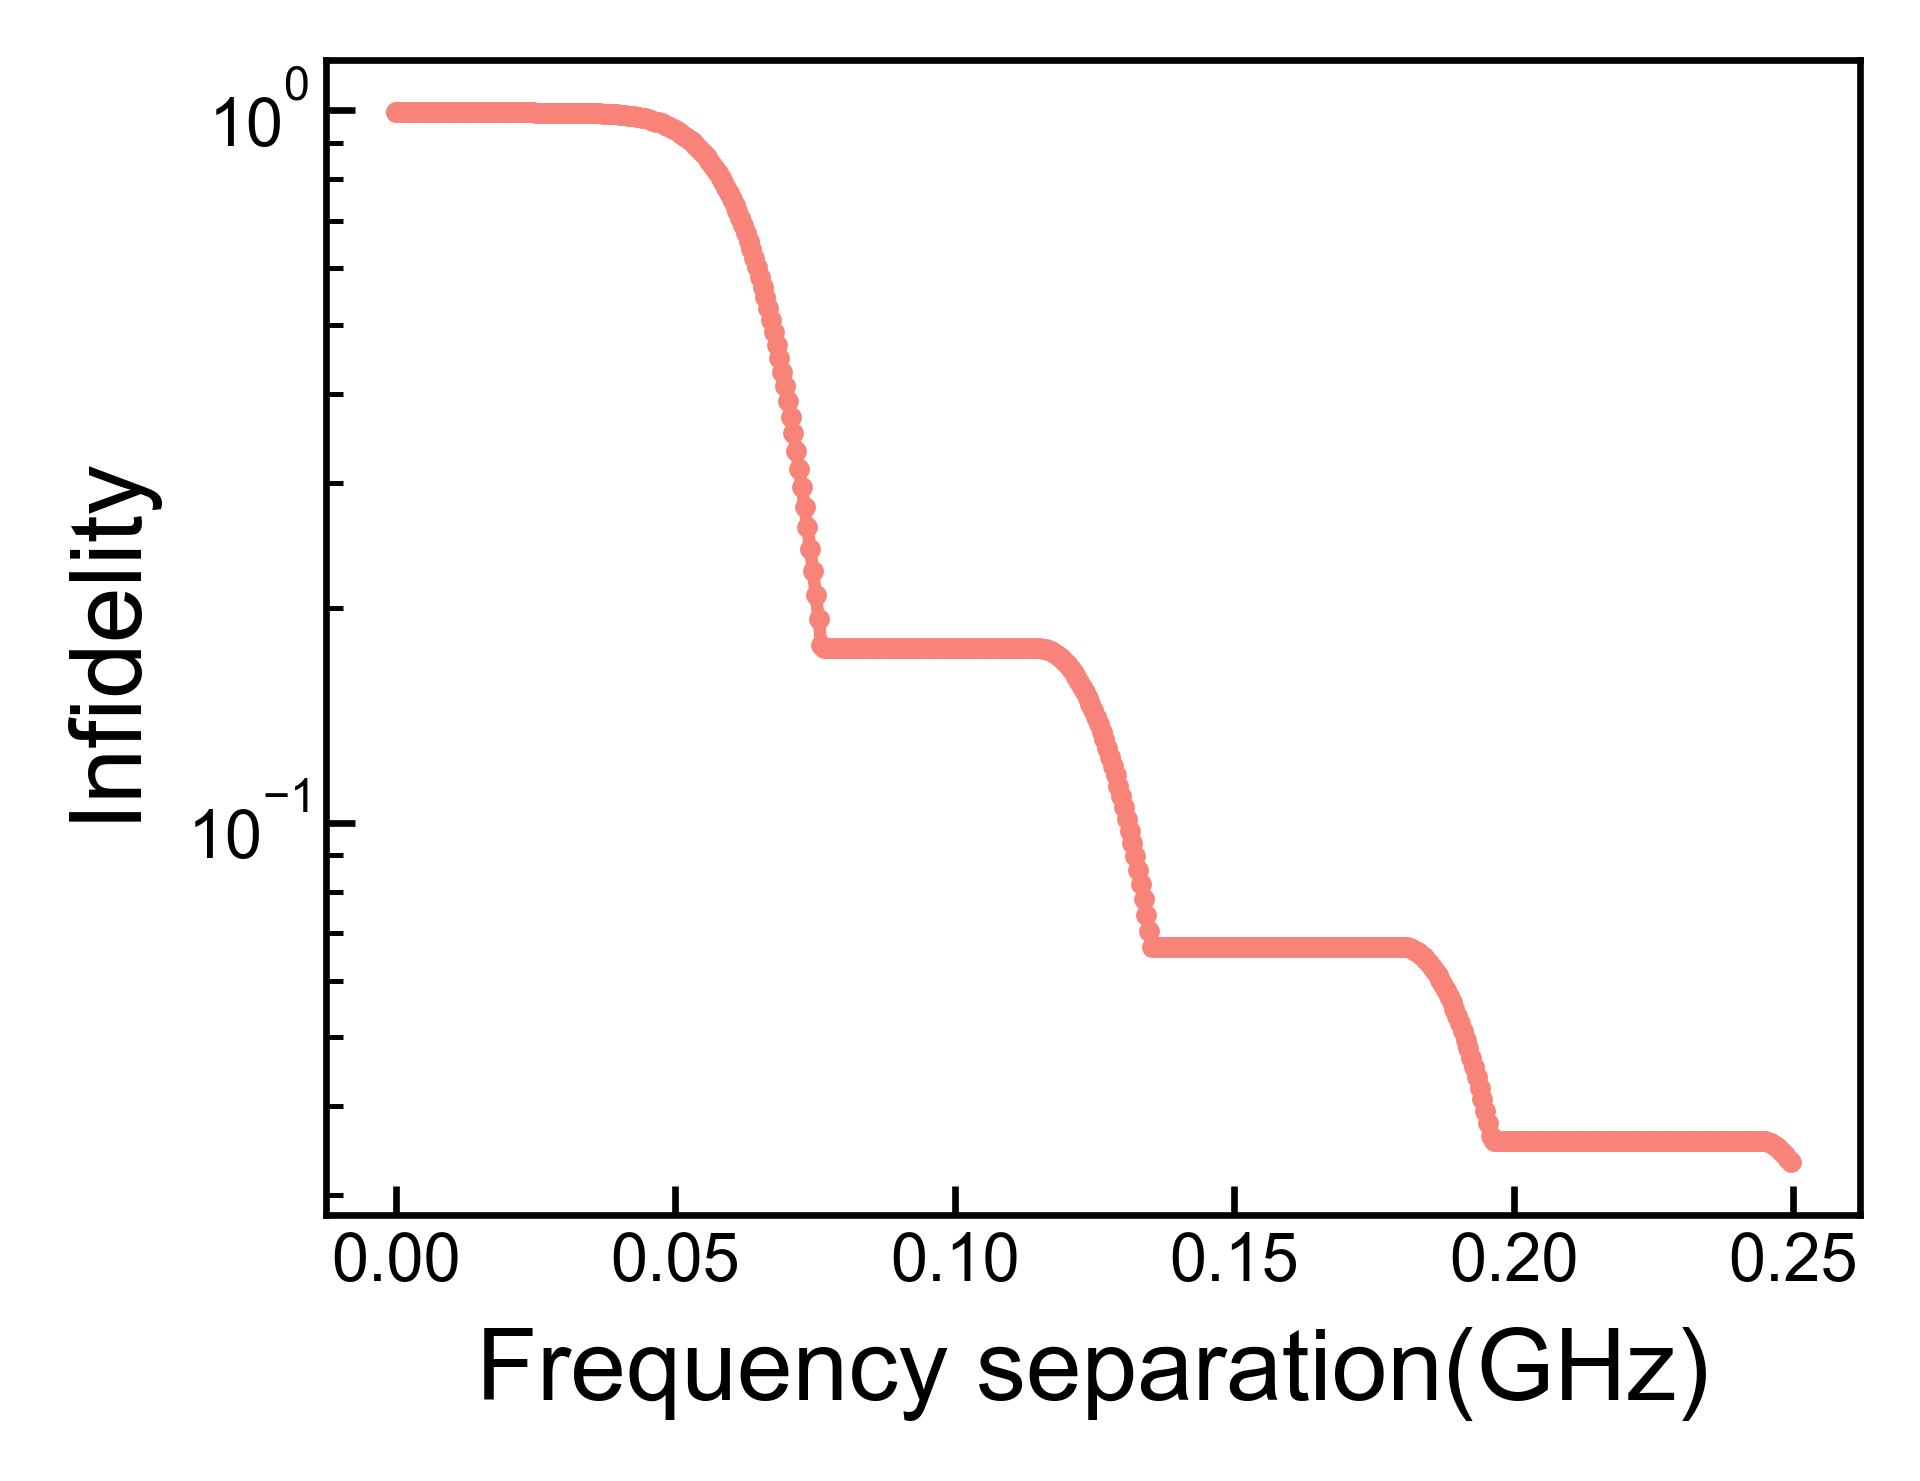

In [61]:
# function smoothing
for i in range(int(index_correctors), len(infid_re) + int(index_correctors)):
    # if i > int(index_correctors):
        infid_new_plot.append(np.max(infid_use[i - int(index_correctors): i + int(index_correctors)]))
    # else:
    #     new_var = np.abs(int(index_correctors) - i)
    #     infid_new_plot.append(np.max(infid_use[new_var: i + int(index_correctors)]))

# plot results
fig, axs = plt.subplots()
# axs.plot(min_sep, fids, 'o', linestyle = '-')
# axs.plot(min2, fids2, 'o', linestyle = '-')
# axs.plot(min3, fids3, 'o', linestyle = '-')
axs.set_ylabel('Infidelity', fontsize = 12)
axs.set_xlabel('Frequency separation(GHz)', fontsize = 12)
axs.tick_params(axis="y",direction="in", pad = 2)
axs.tick_params(axis="x",direction="in", pad = 2)
axs.tick_params(which='minor', direction = 'in')
axs.yaxis.get_major_ticks()[1].label1.set_visible(False)
axs.plot(min_sep[499:999], infid_new_plot, '.', markersize = 3, linestyle = '-', color = '#F88379')
plt.yscale("log") 


In [171]:
index_list = [index1, index2, index3]
index_list4 = [index14, index24, index34]
index_list6 = [index16, index26, index36]

In [172]:
def new_infid(index_list, index_correctors, infid_re):
    for i in index_list:
        separation_infid = infid_re[i + int(index_correctors)] - infid_re[i - int(index_correctors)]
        slope = separation_infid / (2 * int(index_correctors))
        for j in range(2 * int(index_correctors)):
            infid_re[i - int(index_correctors) + j] = infid_re[i - int(index_correctors)] + j * slope
    
    return infid_re

In [173]:
infid_ew_new = new_infid(index_list=index_list, index_correctors=index_correctors, infid_re=infid_re)
infid_re_new_4 = new_infid(index_list=index_list4, index_correctors=index_correctors4, infid_re=infid_re4)
infid_re_new_6 = new_infid(index_list=index_list6, index_correctors=index_correctors6, infid_re=infid_re6)

In [174]:
# for i in index_list:
#     separation_infid = infid_re[i + int(index_correctors)] - infid_re[i - int(index_correctors)]
#     slope = separation_infid / (2 * int(index_correctors))
#     for j in range(2 * int(index_correctors)):
#         infid_re[i - int(index_correctors) + j] = infid_re[i - int(index_correctors)] + j * slope


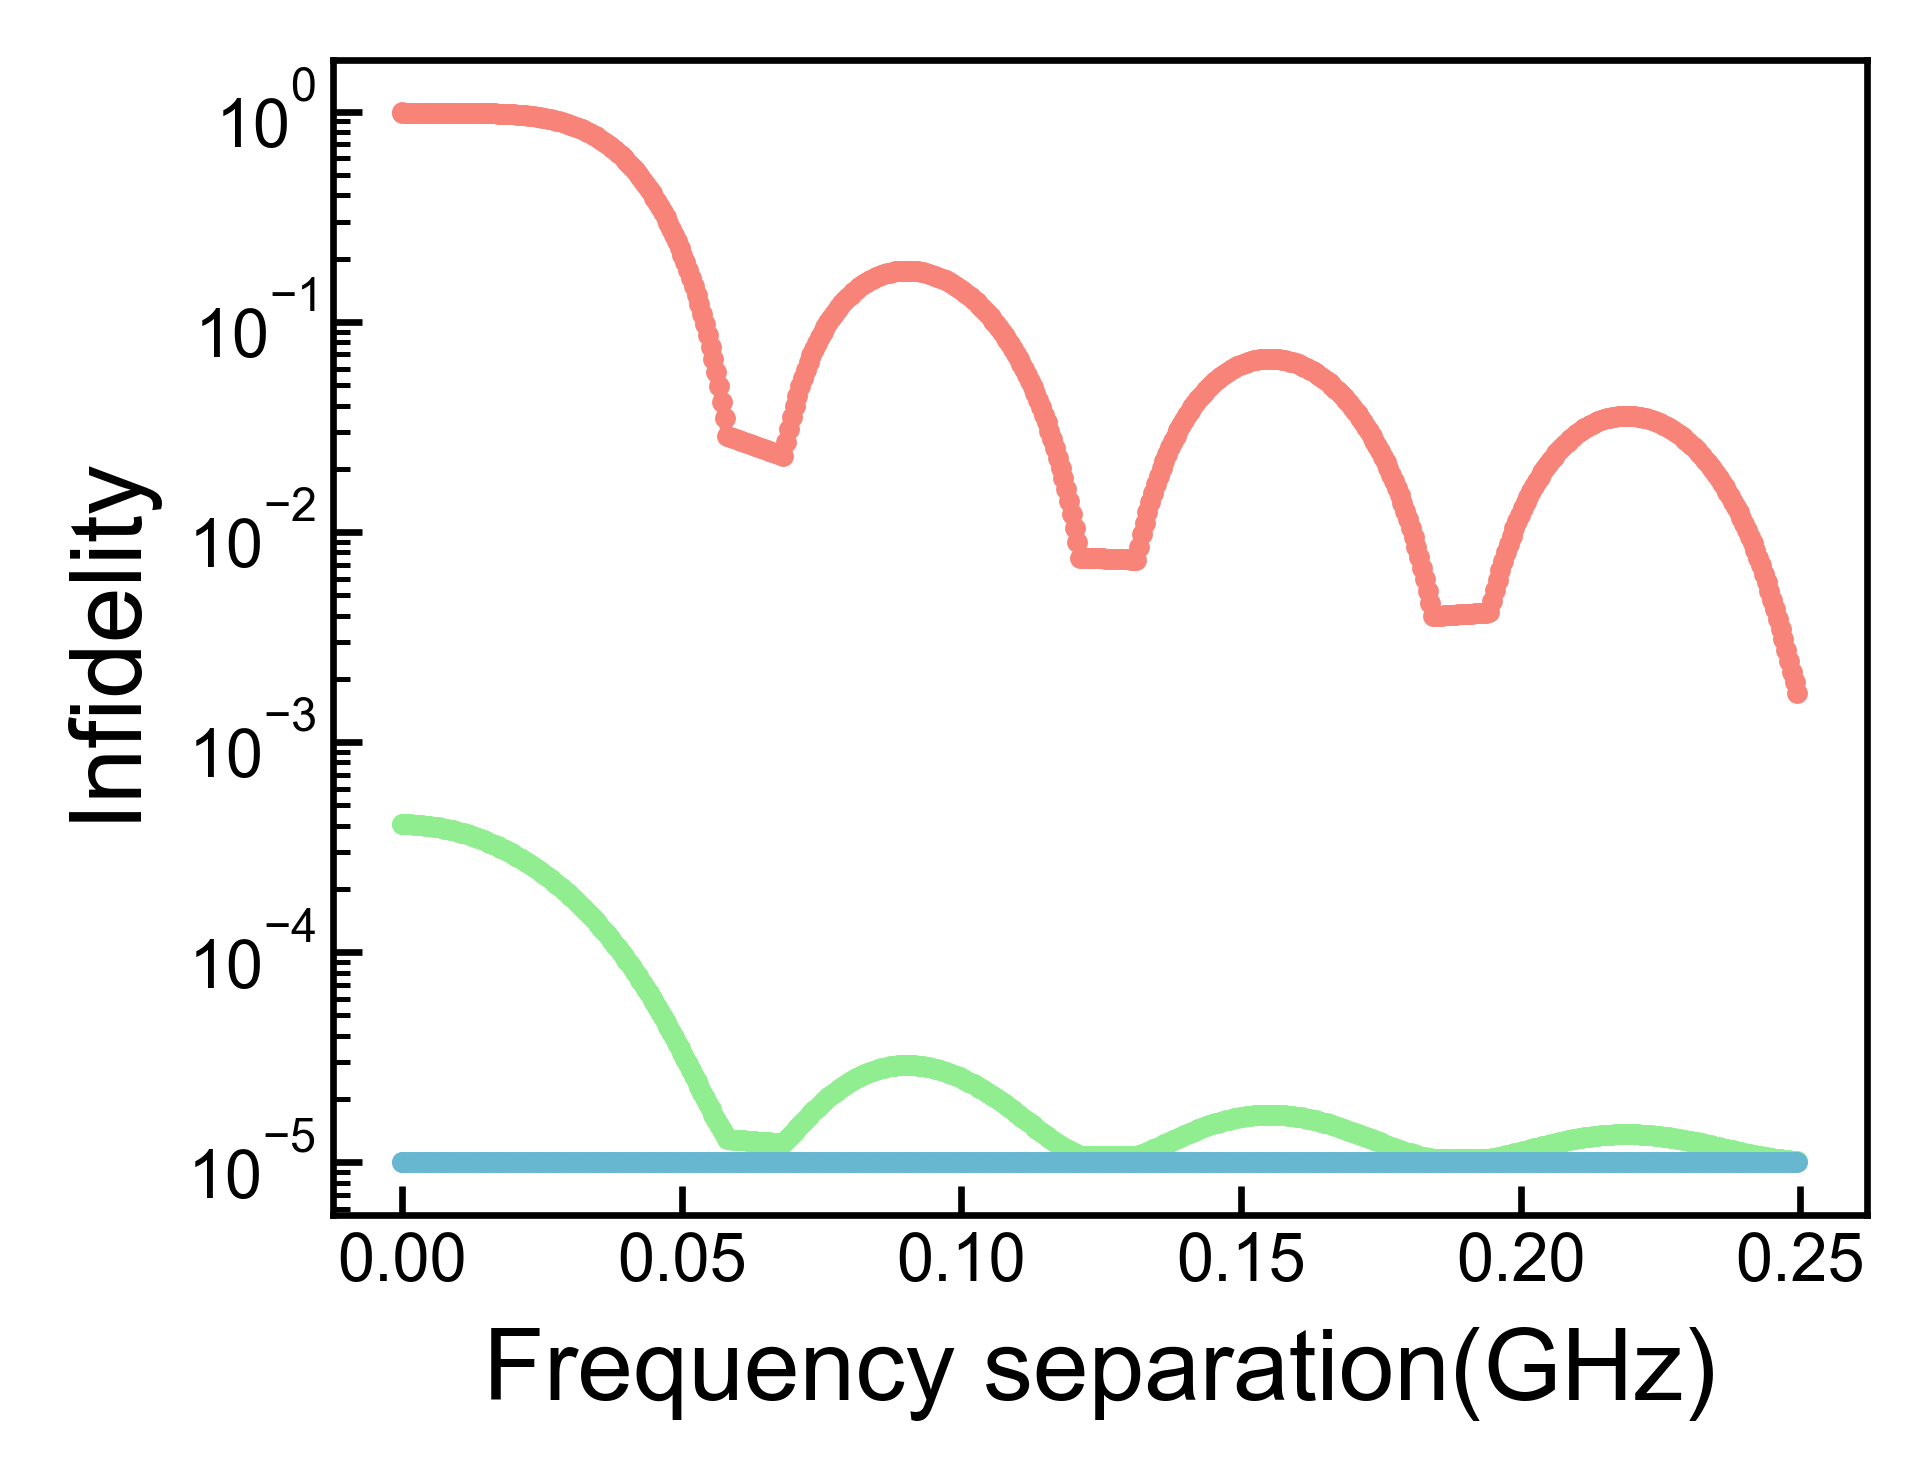

In [175]:
fig, axs = plt.subplots()
# axs.plot(min_sep, fids, 'o', linestyle = '-')
# axs.plot(min2, fids2, 'o', linestyle = '-')
# axs.plot(min3, fids3, 'o', linestyle = '-')
axs.set_ylabel('Infidelity', fontsize = 12)
axs.set_xlabel('Frequency separation(GHz)', fontsize = 12)
axs.tick_params(axis="y",direction="in", pad = 2)
axs.tick_params(axis="x",direction="in", pad = 2)
axs.tick_params(which='minor', direction = 'in')
axs.yaxis.get_major_ticks()[1].label1.set_visible(False)
axs.plot(min_sep[499:999], infid_re, '.', markersize = 3, linestyle = '-', color = '#F88379')
axs.plot(mins2[499:999], infid_re_new_4, '.', markersize = 3, linestyle = '-', color = '#90EE90')
axs.plot(mins3[499:999], infid_re_new_6, '.', markersize = 3, linestyle = '-', color = '#67B7D1')
plt.yscale("log") 

In [ ]:
fig, axs = plt.subplots()
# axs.plot(min_sep, fids, 'o', linestyle = '-')
# axs.plot(min2, fids2, 'o', linestyle = '-')
# axs.plot(min3, fids3, 'o', linestyle = '-')
axs.set_ylabel('Infidelity', fontsize = 12)
axs.set_xlabel('Frequency separation(GHz)', fontsize = 12)
axs.tick_params(axis="y",direction="in", pad = 2)
axs.tick_params(axis="x",direction="in", pad = 2)
axs.tick_params(which='minor', direction = 'in')
axs.yaxis.get_major_ticks()[1].label1.set_visible(False)
axs.plot(min_sep_adjust, infid_re, '.', markersize = 3, linestyle = '-', color = '#F88379')
plt.yscale("log") 

In [ ]:
fids.clear()
fids2.clear()
fids3.clear()
min_sep.clear()
main_min.clear()
min_sep2.clear()
min_sep3.clear()
for i in freqs:
    w3.append((6 - i) + 4)
    H = crowding(qubit4_freq=i, qubit3_freq=4.5, lam_mag=mag_amp[0][0], lam_power=2, mod_num=1, amp=mag_amp[0][1])
    fids.append(H.result())
    A = crowding(qubit4_freq=i, qubit3_freq=4.5, lam_mag=mag_amp[0][0], lam_power=4, mod_num=1, amp=mag_amp[0][1])
    min_sep2.append(A.main_gate_sep())
    B = crowding(qubit4_freq=i, qubit3_freq=4.5, lam_mag=mag_amp[0][0], lam_power=6, mod_num=1, amp=mag_amp[0][1])
    min_sep3.append(B.main_gate_sep())
    fids2.append(A.result())
    fids3.append(B.result())
    min_sep.append(H.min_sep())
    main_min.append(H.main_gate_sep())

# fig, axs = plt.subplots()
fig, axs = plt.subplots()
axs.plot(freqs, fids, 'o', linestyle = '-')
axs.plot(freqs, fids2, 'o', linestyle = '-')
axs.plot(freqs, fids3, 'o', linestyle = '-')

In [ ]:
# making a vertical line plot 
x_positions = [4, 6]
colors = ['green', 'green']
fig, axs = plt.subplots()
# for x, color in zip(x_positions, colors):
axs.axvline(x=x_positions[0], color=colors[0], linestyle='-', linewidth=2)
axs.axvline(x=x_positions[1], color=colors[1], linestyle='-', linewidth=2)

# axs.set_title('Gate separation frequencies for λ{}'.format(dict1.get('2')))
axs.set_xlabel('Qubit location(GHz)', fontsize = 12)
axs.tick_params(axis="y",direction="in", pad=2)
axs.tick_params(axis="x",direction="in", pad=2)
axs.set_ylim(0, .1)
plt.tick_params(left = False) 
axs.yaxis.set_tick_params(labelleft=False)
plt.xlim(3.5, 6.5)
plt.show()

In [ ]:
# making a vertical line plot 
x_positions = [0.0, 0.0005]
colors = ['green', 'red']
fig, axs = plt.subplots()
for x, color in zip(x_positions, colors):
    axs.axvline(x=x, color=color, linestyle='-', linewidth=2)

axs.set_title('Gate separation frequencies for λ{}'.format(dict1.get('4')))
axs.set_xlabel('minimum gate separation(GHz)')
axs.tick_params(axis="y",direction="in", pad=2)
axs.tick_params(axis="x",direction="in", pad=2)
plt.tick_params(left = False) 
axs.yaxis.set_tick_params(labelleft=False)
plt.xlim(-0.2, 1)
plt.show()

In [ ]:
x_positions1 = [0.0, 0.25]
colors1 = ['green', 'red']
x_positions2 = [0.0, 0.04]
colors2 = ['green', 'red']
x_positions3 = [0.0, 0.0]
colors3 = ['green', 'red']

fig, axs = plt.subplots(3)
for x, color in zip(x_positions1, colors1):
    axs[0].axvline(x=x, color=color, linestyle='-', linewidth=2)
    # if color == 'green':
    # axs[0].text(x_positions1, x_positions1, f"driven", rotation=90)
    # else:
    #     axs[0].text(x_positions1, 'spectator', ha='right', va='center')

for x, color in zip(x_positions2, colors2):
    axs[1].axvline(x=x, color=color, linestyle='-', linewidth=2)
for x, color in zip(x_positions3, colors3):
    axs[2].axvline(x=x, color=color, linestyle='-', linewidth=2)
for i in range(3):
    # axs[i].set_title('Gate separation frequencies for λ{}'.format(dict1.get('6')))
    axs[i].tick_params(axis="y",direction="in", pad=2)
    axs[i].tick_params(axis="x",direction="in", pad=2)
    axs[i].yaxis.set_tick_params(labelleft=False)
    axs[i].xaxis.set_tick_params(labelbottom=False)
    axs[i].set_xlim(-0.1, .4)
    axs[i].tick_params(left = False) 

axs[2].xaxis.set_tick_params(labelbottom=True)
axs[2].set_xlabel('minimum gate separation(GHz)', fontsize = 12)
fig.show()

In [ ]:
# making a vertical line plot 
x_positions = [0.0, 0.0005]
colors = ['green', 'red']
fig, axs = plt.subplots()
for x, color in zip(x_positions, colors):
    axs.axvline(x=x, color=color, linestyle='-', linewidth=2)

axs.set_title('Gate separation frequencies for λ{}'.format(dict1.get('6')))
axs.set_xlabel('minimum gate separation(GHz)')
axs.tick_params(axis="y",direction="in", pad=2)
axs.tick_params(axis="x",direction="in", pad=2)
plt.tick_params(left = False) 
axs.yaxis.set_tick_params(labelleft=False)
plt.xlim(-0.2, 1)
plt.show()

In [ ]:
fids.clear()
fids2.clear()
fids3.clear()
min_sep.clear()
main_min.clear()
min_sep2.clear()
min_sep3.clear()
min2.clear()
min3.clear()
for i in freqs:
    w3.append((6 - i) + 4)
    H = crowding(qubit4_freq=i, qubit3_freq=4.5, lam_mag=mag_amp[1][0], lam_power=2, mod_num=2, amp=mag_amp[1][1])
    fids.append(H.result())
    A = crowding(qubit4_freq=i, qubit3_freq=4.5, lam_mag=mag_amp[1][0], lam_power=4, mod_num=2, amp=mag_amp[1][1])
    min_sep2.append(A.main_gate_sep())
    B = crowding(qubit4_freq=i, qubit3_freq=4.5, lam_mag=mag_amp[1][0], lam_power=6, mod_num=2, amp=mag_amp[1][1])
    min_sep3.append(B.main_gate_sep())
    fids2.append(A.result())
    fids3.append(B.result())
    min_sep.append(H.min_sep())
    min2.append(A.min_sep())
    min3.append(B.min_sep())
    main_min.append(H.main_gate_sep())

plt.clf()
fig, axs = plt.subplots()
# axs.plot(min_sep, fids, 'o', linestyle = '-')
# axs.plot(min2, fids2, 'o', linestyle = '-')
# axs.plot(min_sep3, fids3, 'o', linestyle = '-')
axs.plot(min_sep, fids, 'o', linestyle = '-')
axs.plot(min2, fids2, 'o', linestyle = '-')
axs.plot(min3, fids3, 'o', linestyle = '-')
axs.set_ylabel('Fidelity', fontsize = 12)
axs.set_xlabel('Frequency separation', fontsize = 12)

# right now this is based on minimum separation not just the separation between the driven gate and the bad gate 

In [ ]:
fids.clear()
fids2.clear()
fids3.clear()
min_sep.clear()
main_min.clear()
min_sep2.clear()
min_sep3.clear()
for i in freqs:
    w3.append((6 - i) + 4)
    H = crowding(qubit4_freq=i, qubit3_freq=4.5, lam_mag=mag_amp[1][0], lam_power=2, mod_num=2, amp=mag_amp[1][1])
    fids.append(H.result())
    A = crowding(qubit4_freq=i, qubit3_freq=4.5, lam_mag=mag_amp[1][0], lam_power=4, mod_num=2, amp=mag_amp[1][1])
    min_sep2.append(A.main_gate_sep())
    B = crowding(qubit4_freq=i, qubit3_freq=4.5, lam_mag=mag_amp[1][0], lam_power=6, mod_num=2, amp=mag_amp[1][1])
    min_sep3.append(B.main_gate_sep())
    fids2.append(A.result())
    fids3.append(B.result())
    min_sep.append(H.min_sep())
    main_min.append(H.main_gate_sep())

# fig, axs = plt.subplots()
fig, axs = plt.subplots()
axs.plot(freqs, fids, 'o', linestyle = '-')
axs.plot(freqs, fids2, 'o', linestyle = '-')
axs.plot(freqs, fids3, 'o', linestyle = '-')

In [ ]:
# making a vertical line plot 
x_positions = [0.0, 0.25]
colors = ['green', 'red']
fig, axs = plt.subplots()
for x, color in zip(x_positions, colors):
    axs.axvline(x=x, color=color, linestyle='-', linewidth=2)

axs.set_title('Gate separation frequencies for λ{}'.format(dict1.get('2')))
axs.set_xlabel('X-axis')
axs.tick_params(axis="y",direction="in", pad=2)
axs.tick_params(axis="x",direction="in", pad=2)
plt.tick_params(left = False) 
axs.yaxis.set_tick_params(labelleft=False)
plt.xlim(-0.2, 1)
plt.show()

In [ ]:
# making a vertical line plot 
x_positions = [0.0, 0.075]
colors = ['green', 'red']
fig, axs = plt.subplots()
for x, color in zip(x_positions, colors):
    axs.axvline(x=x, color=color, linestyle='-', linewidth=2)

axs.set_title('Gate separation frequencies for λ{}'.format(dict1.get('4')))
axs.set_xlabel('X-axis')
axs.tick_params(axis="y",direction="in", pad=2)
axs.tick_params(axis="x",direction="in", pad=2)
plt.tick_params(left = False) 
axs.yaxis.set_tick_params(labelleft=False)
plt.xlim(-0.2, 1)
plt.show()

In [ ]:
# making a vertical line plot 
x_positions = [0.0, 0.005]
colors = ['green', 'red']
fig, axs = plt.subplots()
for x, color in zip(x_positions, colors):
    axs.axvline(x=x, color=color, linestyle='-', linewidth=2)

axs.set_title('Gate separation frequencies for λ{}'.format(dict1.get('6')))
axs.set_xlabel('X-axis')
axs.tick_params(axis="y",direction="in", pad=2)
axs.tick_params(axis="x",direction="in", pad=2)
plt.tick_params(left = False) 
axs.yaxis.set_tick_params(labelleft=False)
plt.xlim(-0.2, 1)
plt.show()

In [ ]:
fids.clear()
fids2.clear()
fids3.clear()
min_sep.clear()
main_min.clear()
min_sep2.clear()
min_sep3.clear()
min2 = []
min3 = []
min2.clear()
min3.clear()
infid2 = []
infid4 = []
infid6 = []
infid2.clear()
infid4.clear()
infid6.clear()

for i in freqs:
    w3.append((6 - i) + 4)
    H = crowding(qubit4_freq=i, qubit3_freq=4.5, lam_mag=mag_amp[2][0], lam_power=2, mod_num=2, amp=mag_amp[2][1])
    fids.append(H.result())
    A = crowding(qubit4_freq=i, qubit3_freq=4.5, lam_mag=mag_amp[2][0], lam_power=4, mod_num=2, amp=mag_amp[2][1])
    min_sep2.append(A.main_gate_sep())
    B = crowding(qubit4_freq=i, qubit3_freq=4.5, lam_mag=mag_amp[2][0], lam_power=6, mod_num=2, amp=mag_amp[2][1])
    min_sep3.append(B.main_gate_sep())
    min2.append(A.min_sep())
    min3.append(B.min_sep())
    fids2.append(A.result())
    fids3.append(B.result())
    min_sep.append(H.min_sep())
    main_min.append(H.main_gate_sep())


for i in range(len(fids)):
    infid2.append(1 - fids[i])
    infid4.append(1 - fids2[i])
    infid6.append(1 - fids3[i])
    
plt.clf()
fig, axs = plt.subplots()
# axs.plot(main_min, fids, 'o', linestyle = '-')
# axs.plot(min_sep2, fids2, 'o', linestyle = '-')
# axs.plot(min_sep3, fids3, 'o', linestyle = '-')
# axs.plot(min_sep, fids, 'o', linestyle = '-')
# axs.plot(min2, fids2, 'o', linestyle = '-')
# axs.plot(min3, fids3, 'o', linestyle = '-')
axs.plot(min_sep, infid2, '.', markersize = 3, linestyle = '-', color = '#F88379')
axs.plot(min2, infid4, '.', markersize = 3, linestyle = '-', color = '#90EE90')
axs.plot(min3, infid6, '.', markersize = 3, linestyle = '-', color = '#67B7D1')
axs.tick_params(axis="y",direction="in", pad = 2)
axs.tick_params(axis="x",direction="in", pad = 2)
axs.tick_params(which='minor', direction = 'in')
axs.yaxis.get_major_ticks()[1].label1.set_visible(False)
plt.yscale("log") 
axs.invert_yaxis()
axs.set_ylabel('Infidelity', fontsize = 12)
axs.set_xlabel('Frequency separation(GHz)', fontsize = 12)

In [ ]:
fids.clear()
fids2.clear()
fids3.clear()
min_sep.clear()
main_min.clear()
min_sep2.clear()
min_sep3.clear()
for i in freqs:
    w3.append((6 - i) + 4)
    H = crowding(qubit4_freq=i, qubit3_freq=4.5, lam_mag=mag_amp[2][0], lam_power=2, mod_num=2, amp=mag_amp[2][1])
    fids.append(H.result())
    A = crowding(qubit4_freq=i, qubit3_freq=4.5, lam_mag=mag_amp[2][0], lam_power=4, mod_num=2, amp=mag_amp[2][1])
    min_sep2.append(A.main_gate_sep())
    B = crowding(qubit4_freq=i, qubit3_freq=4.5, lam_mag=mag_amp[2][0], lam_power=6, mod_num=2, amp=mag_amp[2][1])
    min_sep3.append(B.main_gate_sep())
    fids2.append(A.result())
    fids3.append(B.result())
    min_sep.append(H.min_sep())
    main_min.append(H.main_gate_sep())

# fig, axs = plt.subplots()
fig, axs = plt.subplots()
axs.plot(freqs, fids, 'o', linestyle = '-')
axs.plot(freqs, fids2, 'o', linestyle = '-')
axs.plot(freqs, fids3, 'o', linestyle = '-')

In [ ]:
x_positions1 = [0.0, 0.25]
colors1 = ['green', 'red']
x_positions2 = [0.0, 0.225]
colors2 = ['green', 'red']
x_positions3 = [0.0, 0.15]
colors3 = ['green', 'red']

fig, axs = plt.subplots(3)
for x, color in zip(x_positions1, colors1):
    axs[0].axvline(x=x, color=color, linestyle='-', linewidth=2)
for x, color in zip(x_positions2, colors2):
    axs[1].axvline(x=x, color=color, linestyle='-', linewidth=2)
for x, color in zip(x_positions3, colors3):
    axs[2].axvline(x=x, color=color, linestyle='-', linewidth=2)
for i in range(3):
    # axs[i].set_title('Gate separation frequencies for λ{}'.format(dict1.get('6')))
    axs[i].tick_params(axis="y",direction="in", pad=2)
    axs[i].tick_params(axis="x",direction="in", pad=2)
    axs[i].yaxis.set_tick_params(labelleft=False)
    axs[i].xaxis.set_tick_params(labelbottom=False)
    axs[i].set_xlim(-0.1, .4)
    axs[i].tick_params(left = False) 

axs[2].xaxis.set_tick_params(labelbottom=True)
axs[2].set_xlabel('minimum gate separation(GHz)', fontsize = 12)
fig.show()

In [ ]:
# making a vertical line plot 
x_positions = [0.0, 0.25]
colors = ['green', 'red']
fig, axs = plt.subplots()
for x, color in zip(x_positions, colors):
    axs.axvline(x=x, color=color, linestyle='-', linewidth=2)

axs.set_title('Gate separation frequencies for λ{}'.format(dict1.get('2')))
axs.set_xlabel('X-axis')
axs.tick_params(axis="y",direction="in", pad=2)
axs.tick_params(axis="x",direction="in", pad=2)
plt.tick_params(left = False) 
axs.yaxis.set_tick_params(labelleft=False)
plt.xlim(-0.2, 1)
plt.show()

In [ ]:
# making a vertical line plot 
x_positions = [0.0, 0.07]
colors = ['green', 'red']
fig, axs = plt.subplots()
for x, color in zip(x_positions, colors):
    axs.axvline(x=x, color=color, linestyle='-', linewidth=2)

axs.set_title('Gate separation frequencies for λ{}'.format(dict1.get('4')))
axs.set_xlabel('X-axis')
axs.tick_params(axis="y",direction="in", pad=2)
axs.tick_params(axis="x",direction="in", pad=2)
plt.tick_params(left = False) 
axs.yaxis.set_tick_params(labelleft=False)
plt.xlim(-0.2, 1)
plt.show()

In [ ]:
# making a vertical line plot 
x_positions = [0.0, 0.0005]
colors = ['green', 'red']
fig, axs = plt.subplots()
for x, color in zip(x_positions, colors):
    axs.axvline(x=x, color=color, linestyle='-', linewidth=2)

axs.set_title('Gate separation frequencies for λ{}'.format(dict1.get('4')))
axs.set_xlabel('X-axis')
axs.tick_params(axis="y",direction="in", pad=2)
axs.tick_params(axis="x",direction="in", pad=2)
plt.tick_params(left = False) 
axs.yaxis.set_tick_params(labelleft=False)
plt.xlim(-0.2, 1)
plt.show()

In [ ]:
fids.clear()
fids2.clear()
fids3.clear()
min_sep.clear()
main_min.clear()
min_sep2.clear()
min_sep3.clear()
for i in freqs:
    w3.append((6 - i) + 4)
    H = crowding(qubit4_freq=i, qubit3_freq=4.5, lam_mag=mag_amp[3][0], lam_power=2, mod_num=2, amp=mag_amp[3][1])
    fids.append(H.result())
    A = crowding(qubit4_freq=i, qubit3_freq=4.5, lam_mag=mag_amp[3][0], lam_power=4, mod_num=2, amp=mag_amp[3][1])
    min_sep2.append(A.main_gate_sep())
    B = crowding(qubit4_freq=i, qubit3_freq=4.5, lam_mag=mag_amp[3][0], lam_power=6, mod_num=2, amp=mag_amp[3][1])
    min_sep3.append(B.main_gate_sep())
    fids2.append(A.result())
    fids3.append(B.result())
    min_sep.append(H.min_sep())
    main_min.append(H.main_gate_sep())
plt.clf()
fig, axs = plt.subplots()
# axs.plot(main_min, fids, 'o', linestyle = '-')
# axs.plot(min_sep2, fids2, 'o', linestyle = '-')
# axs.plot(min_sep3, fids3, 'o', linestyle = '-')
axs.plot(min_sep, fids, 'o', linestyle = '-')
axs.plot(min2, fids2, 'o', linestyle = '-')
axs.plot(min3, fids3, 'o', linestyle = '-')
axs.set_ylabel('Fidelity', fontsize = 12)
axs.set_xlabel('Frequency separation', fontsize = 12)

In [ ]:
fids.clear()
fids2.clear()
fids3.clear()
min_sep.clear()
main_min.clear()
min_sep2.clear()
min_sep3.clear()
for i in freqs:
    w3.append((6 - i) + 4)
    H = crowding(qubit4_freq=i, qubit3_freq=4.5, lam_mag=mag_amp[3][0], lam_power=2, mod_num=2, amp=mag_amp[3][1])
    fids.append(H.result())
    A = crowding(qubit4_freq=i, qubit3_freq=4.5, lam_mag=mag_amp[3][0], lam_power=4, mod_num=2, amp=mag_amp[3][1])
    min_sep2.append(A.main_gate_sep())
    B = crowding(qubit4_freq=i, qubit3_freq=4.5, lam_mag=mag_amp[3][0], lam_power=6, mod_num=2, amp=mag_amp[3][1])
    min_sep3.append(B.main_gate_sep())
    fids2.append(A.result())
    fids3.append(B.result())
    min_sep.append(H.min_sep())
    main_min.append(H.main_gate_sep())

# fig, axs = plt.subplots()
fig, axs = plt.subplots()
axs.plot(freqs, fids, 'o', linestyle = '-')
axs.plot(freqs, fids2, 'o', linestyle = '-')
axs.plot(freqs, fids3, 'o', linestyle = '-')

In [ ]:
# making a vertical line plot 
x_positions = [0.0, 0.25]
colors = ['green', 'red']
fig, axs = plt.subplots()
for x, color in zip(x_positions, colors):
    axs.axvline(x=x, color=color, linestyle='-', linewidth=2)

axs.set_title('Gate separation frequencies for λ{}'.format(dict1.get('2')))
axs.set_xlabel('X-axis')
axs.tick_params(axis="y",direction="in", pad=2)
axs.tick_params(axis="x",direction="in", pad=2)
plt.tick_params(left = False) 
axs.yaxis.set_tick_params(labelleft=False)
plt.xlim(-0.2, 1)
plt.show()

In [ ]:
# making a vertical line plot 
x_positions = [0.0, 0.15]
colors = ['green', 'red']
fig, axs = plt.subplots()
for x, color in zip(x_positions, colors):
    axs.axvline(x=x, color=color, linestyle='-', linewidth=2)

axs.set_title('Gate separation frequencies for λ{}'.format(dict1.get('4')))
axs.set_xlabel('X-axis')
axs.tick_params(axis="y",direction="in", pad=2)
axs.tick_params(axis="x",direction="in", pad=2)
plt.tick_params(left = False) 
axs.yaxis.set_tick_params(labelleft=False)
plt.xlim(-0.2, 1)
plt.show()

In [ ]:
# making a vertical line plot 
x_positions = [0.0, 0.005]
colors = ['green', 'red']
fig, axs = plt.subplots()
for x, color in zip(x_positions, colors):
    axs.axvline(x=x, color=color, linestyle='-', linewidth=2)

axs.set_title('Gate separation frequencies for λ{}'.format(dict1.get('6')))
axs.set_xlabel('X-axis')
axs.tick_params(axis="y",direction="in", pad=2)
axs.tick_params(axis="x",direction="in", pad=2)
plt.tick_params(left = False) 
axs.yaxis.set_tick_params(labelleft=False)
plt.xlim(-0.2, 1)
plt.show()